### Histogramas con funciones


In [42]:
#Importar todos los paquetes requeridos

from pathlib import Path
from datetime import datetime
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter

In [38]:
# --- Configuración ---
CSV_PATH = Path("../../data/categorias_de_corredores.csv")  # Ajusta si estás en otra carpeta
OUT_DIR = Path("01_histogramas")                      # Carpeta de salida
BINS = 10                                              # Número de bins


In [47]:
# Cargar CSV
if not CSV_PATH.exists():
    raise FileNotFoundError(f"No se encontró el archivo: {CSV_PATH}")

df_corredores = pd.read_csv(CSV_PATH, sep="\t")  # Confirmado: separador tabulación
df_corredores.head()

,Corredor,Lugar,Genero,Edad,Pais,Tiempo,Velocidad
0,3475,3592,Male,52,GBR,2.174833e+09,Regular
1,13594,13853,Female,40,NY,2.725500e+02,Regular
2,12012,12256,Male,31,FRA,2.652833e+09,Regular
3,10236,10457,Female,33,MI,2.561500e+02,Regular
4,9476,9686,Male,33,NY,2.522500e+02,Regular


In [49]:
# Detectar columnas numéricas
numeric_cols = []
for col in df_corredores.columns:
    try:
        pd.to_numeric(df_corredores[col], errors="raise")
        numeric_cols.append(col)
    except Exception:
        pass

print("📊 Columnas numéricas detectadas:", numeric_cols)

📊 Columnas numéricas detectadas: ['Corredor', 'Lugar', 'Edad', 'Tiempo']


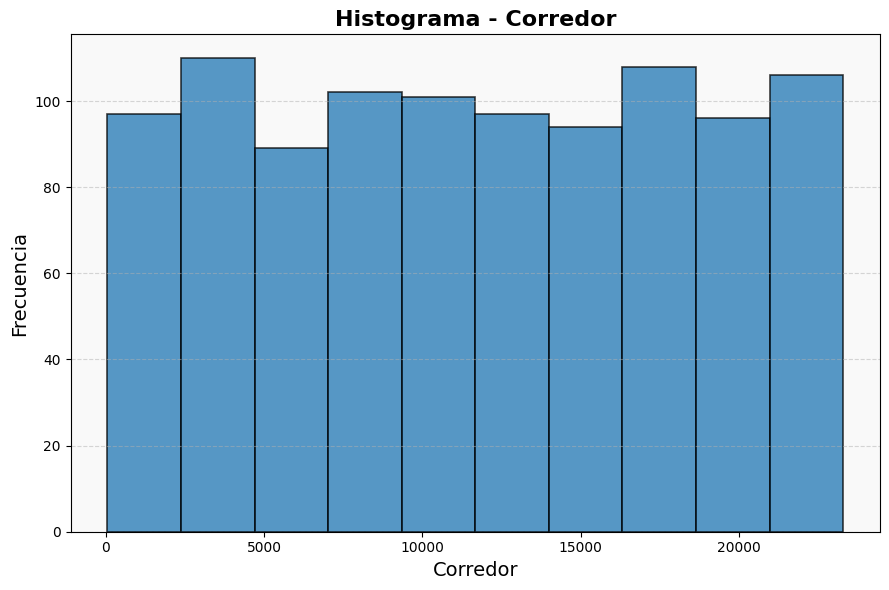

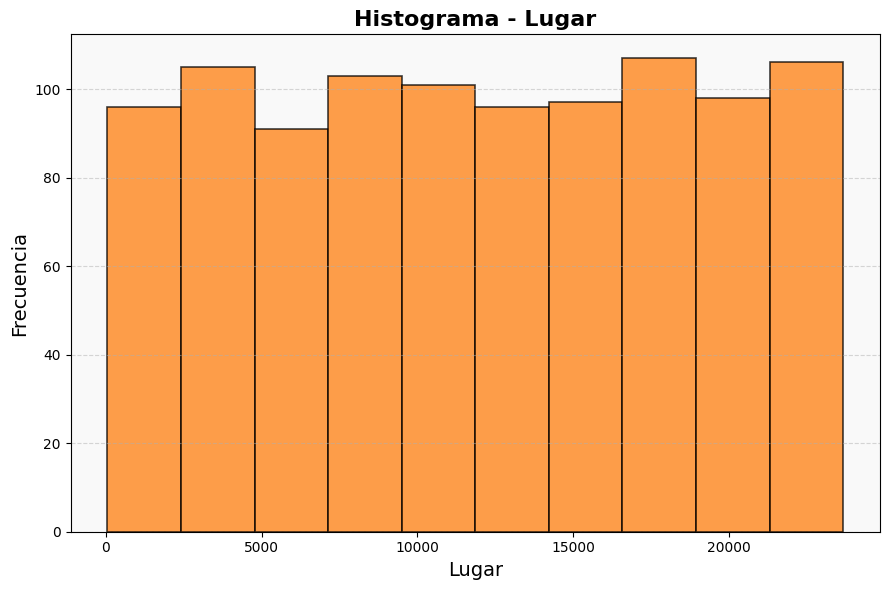

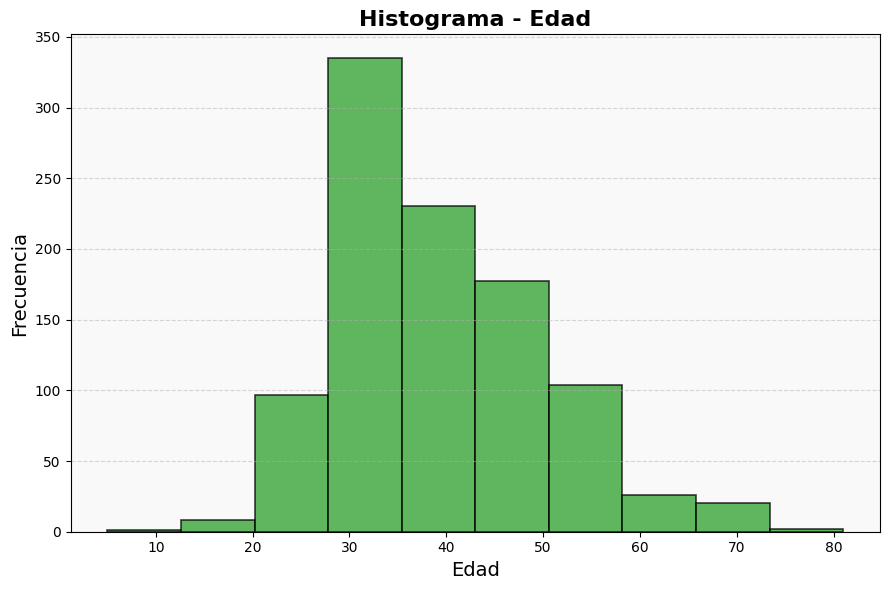

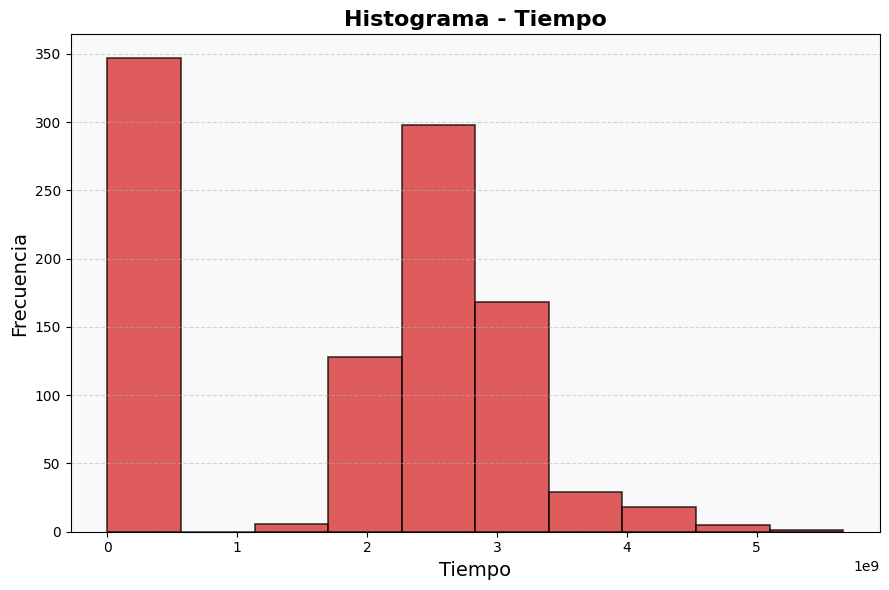

In [56]:
# Crear Histogramas
saved = []
summary_data = []
timestamp = datetime.now().strftime("%d_%m_%Y")
colors = cm.tab10.colors

for i, col in enumerate(numeric_cols):
    s = pd.to_numeric(df_corredores[col], errors="coerce").dropna()
    if s.empty:
        print(f"[skip] '{col}' está vacío después de dropna().")
        continue

    # Guardar estadísticas
    stats = s.describe().to_dict()
    stats["column"] = col
    summary_data.append(stats)

    # Figura con mejor UX
    plt.figure(figsize=(9, 6))
    plt.hist(
        s,
        bins=BINS,
        edgecolor="black",
        color=colors[i % len(colors)],
        alpha=0.75,
        linewidth=1.2
    )
    plt.title(f"Histograma - {col}", fontsize=16, fontweight="bold", color="#000000")
    plt.xlabel(col, fontsize=14)
    plt.ylabel("Frecuencia", fontsize=14)
    plt.grid(axis="y", linestyle="--", alpha=0.5)
    plt.gca().set_facecolor("#f9f9f9")
    plt.gca().yaxis.set_major_formatter(FuncFormatter(lambda x, _: f"{int(x):,}"))
    plt.tight_layout()
    plt.show()

### Utilizando diferentes colores en los Histogramas